In [1]:
import numpy as np
import pandas as pd
import re, string
import os

#import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from langdetect import detect
from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, LatentDirichletAllocation, TruncatedSVD, NMF
from sklearn.cluster import KMeans

from keras.preprocessing import image

from joblib import dump, load
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
%matplotlib inline

# --- Stopwords
PRINTABLE = [i for i in string.printable]
GENREIC = ["ain't", "aren't", "can't", "can't've", "'cause", "could've", "couldn't", "couldn't've", "didn't", "doesn't", "don't", "hadn't", "hadn't've", "hasn't", "haven't", "he'd", "he'd've", "he'll", "he'll've", "he's", "how'd", "how'd'y", "how'll", "how's", "i'd", "i'd've", "i'll", "i'll've", "i'm", "i've", "isn't", "it'd", "it'd've", "it'll", "it'll've", "it's", "let's", "ma'am", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "o'clock", "oughtn't", "oughtn't've", "shan't", "sha'n't", "shan't've", "she'd", "she'd've", "she'll", "she'll've", "she's", "should've", "shouldn't", "shouldn't've", "so've", "so's", "that'd", "that'd've", "that's", "there'd", "there'd've", "there's", "they'd", "they'd've", "they'll", "they'll've", "they're", "they've", "to've", "wasn't", "we'd", "we'd've", "we'll", "we'll've", "we're", "we've", "weren't", "what'll", "what'll've", "what're", "what's", "what've", "when's", "when've", "where'd", "where's", "where've", "who'll", "who'll've", "who's", "who've", "why's", "why've", "will've", "won't", "won't've", "would've", "wouldn't", "wouldn't've", "y'all", "y'all'd", "y'all'd've", "y'all're", "y'all've", "you'd", "you'd've", "you'll", "you'll've", "you're", "you've", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
SUBJECT_RELATED = ['cookbook', 'cookbooks', 'book', 'books', 'recipes', 'like', 'copyright', 'information']
MISC_STOPWORDS = ['com', 'xa']
ADD_STOPWORDS = ["'caus", "'d", "'ll", "'m", "'re", "'s", "'ve", 'abov', 'afterward', 'ai', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'ca', 'cri', 'describ', 'did', 'doe', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifi', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'inform', 'latterli', 'let', 'mani', 'meanwhil', 'moreov', 'mostli', "n't", 'need', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ought', 'ourselv', 'perhap', 'pleas', 'recip', 'seriou', 'sever', 'sha', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'wo', 'yourselv']
COOKBOOK_STOPWORDS = PRINTABLE + GENREIC + SUBJECT_RELATED + MISC_STOPWORDS + ADD_STOPWORDS

VECTORIZATION = {
    'count': CountVectorizer,
    'tfidf': TfidfVectorizer
}

DIMENSIONALITY_REDUCTION = {
    'PCA': PCA,
    'LSA': TruncatedSVD,
    'NMF': NMF,
    'LDA': LatentDirichletAllocation
}

CLUSTERING = {
    'kmeans': KMeans
}

##########################################################################
# --- Helper Classes
class nlp_model:
    """
    
    #--- Parameters and thier defaults if applicable:
    vect_method = "count"
    dim_reduc="LSA"
    clustering="kmeans"
    n_components = 21
    n_clusters=6
                           
    #--- Attributes:
    self.dataNLP
    self.methods = A dictionary of strings representing pipeline of methods used for NLP model
        example: self.methods is {'Vectorization': 'count',
                                  'Dimensionality Reduction': 'LSA',
                                  'Clustering': 'kmeans'
                                  }                             
    self.objects = A dictionary of objects representing instances of methods used for NLP model
        created as part of the model fit self.fit() method
    self.outputs = A dictionary of primary outputs of pipeline used for NLP model
        created as part of the model fit self.fit() method
    self.n_components = number of components for dimensionality reduction
    self.n_clusters = number of clusters for clustering algorithm (might change with other
                      clustering algorithm inclusions in the future)
    
    #--- Methods:
    
    """
    
    def __init__(self, vect_method = "count", dim_reduc="LSA", clustering="kmeans",
                 n_components = 21, n_clusters=6):
        """
        """
        #self.doc_text = data
        
        ##########################################################################
        #--- Create self.methods attribute from the class parameters
        self.methods = {}
        
        # --- Token Vectorization Methods
        if vect_method == "tfidf":
            self.methods['Vectorization'] = vect_method
        else:
            self.methods['Vectorization'] = "count"
            
        # --- Dimensionality Reduction Methods
        if dim_reduc == "PCA" or dim_reduc == "NMF" or dim_reduc == "LDA":
            self.methods['Dimensionality Reduction'] = dim_reduc
        else:
            self.methods['Dimensionality Reduction'] = "LSA"
        
        # --- Clustering Methods (Only kmeans at the moment. Expand based on need)
        if clustering == "kmeans":
            self.methods['Clustering'] = clustering
        else:
            self.methods['Clustering'] = "kmeans"
        
        ##########################################################################
        # --- number of components for dimensionality reduction
        self.n_components = n_components
        
        # --- number of clusters for clustering
        self.n_clusters = n_clusters
        
    def fit(self, data, save_fit = False, filename = None):
        """
        Function to fit the model using the data from the arguments
        Runs through the pipeline as defined in the object instantiation
        
        Argutments:
        data - nlp data in docs X 1 format, and should be readable by vectorization method
        
        Returns: None object
        """
        ##########################################################################
        # --- Get temp methods, once instantiated will be saved under self.objects
        to_vect = VECTORIZATION[self.methods['Vectorization']]
        to_dim_reduce = DIMENSIONALITY_REDUCTION[self.methods['Dimensionality Reduction']]
        to_cluster = CLUSTERING[self.methods['Clustering']]
        
        ##########################################################################
        self.dataNLP = data
        
        self.objects = {}
        self.outputs = {}
        
        #--- Vectorization step
        self.objects['Vectorization'] =  to_vect(stop_words=COOKBOOK_STOPWORDS, tokenizer=textblob_tokenizer)
        vect_data = self.objects['Vectorization'].fit_transform(self.dataNLP)
        self.outputs['Vectorization'] = vect_data.toarray()
        
        #--- Dimensionality Reduction step
        self.objects['Dimensionality Reduction'] = to_dim_reduce(n_components=self.n_components)
        self.outputs['Dimensionality Reduction'] = self.objects['Dimensionality Reduction'].fit_transform(self.outputs['Vectorization'])
        
        #--- Clustering step
        self.objects['Clustering'] = to_cluster(n_clusters=self.n_clusters, random_state=30)
        self.objects['Clustering'].fit(self.outputs['Dimensionality Reduction'])
        self.outputs['Clustering'] = self.objects['Clustering'].labels_
        
        if save_fit and filename:
            dump(self, filename)
        
        
##########################################################################
# --- Helper Functions

# Use TextBlob
# credit: http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/counting-and-stemming/
def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# --- To plot n-dimensional data 
def plot_all_dimensions(data, class_labels, title=""):
    
    plt.rcParams['figure.figsize'] = [30, 20]
    
    dims = data.shape[1]
    assert dims <= 6
    
    count = 1
    for dim in range(dims):
        i = dim
        j = (i+1) * int(dim != dims-1)
        
        plt.subplot(2,3, count)
        plt.scatter(data[:,i], data[:,j],# ckbk_space[vect][dr][:,2],
                   s = 4, alpha = 0.5, c=class_labels)
        plt.title(title, fontsize=20, color='red')
        count += 1
    plt.show()
    
    
# --- Parser for reading in the Amazon json files (can be used for both reviews and metadata)
# --- credits folloing parse() method to Julian McAuley UCSD: http://jmcauley.ucsd.edu/data/amazon/ 
def parse(path):
    g = open(path, 'r')
    for l in g:
        yield json.loads(l)
        

Using TensorFlow backend.


In [2]:
ckbk_meta_file = "../data/amzn/meta_Cookbooks.json"
ckbk_reviews_file = "../data/amzn/Cookbooks.json"

ckbks = pd.read_json(ckbk_meta_file, lines=True)
print(ckbks.columns)
ckbks.drop(['also_buy', 'brand', 'rank', 'also_view', 'main_cat', 'price', 'image', 'feature', 'date',
       'similar_item', 'details'], axis=1, inplace=True)

#######################################################################################
# --- Cleaning and tokenizing titles and descriptions
alphanumeric = lambda x: re.sub('[\d]+', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# --- Lowercase/remove numbers & punctuations/remove stop-words
ckbks['desc_clean'] = ckbks['description'].apply(lambda x: " ".join(str(x).strip().split()))
ckbks['desc_clean'] = ckbks['desc_clean'].map(punc_lower)
ckbks['desc_clean'] = ckbks['desc_clean'].map(alphanumeric)
ckbks['desc_count'] = ckbks['desc_clean'].apply(lambda x: len(list(x.strip().split())))
#ckbks['desc_clean'] = ckbks['desc_clean'].map(alphanumeric) 
#<==== No need to remove stopwords as this step is done in the sklearn token vectorization step

ckbks['title_clean'] = ckbks['title'].apply(lambda x: " ".join(str(x).strip().split()))
ckbks['title_clean'] = ckbks['title_clean'].map(punc_lower)
ckbks['title_clean'] = ckbks['title_clean'].map(alphanumeric)
ckbks['title_count'] = ckbks['title_clean'].apply(lambda x: len(list(x.strip().split())))
#ckbks['desc_clean'] = ckbks['desc_clean'].map(alphanumeric) 
#<==== No need to remove stopwords as this step is done in the sklearn token vectorization step

#ckbks['lang']=ckbks['description'].apply(lambda x: detect(x) if (len(" ".join(str(x).strip().split())) > 5) else "NKnown")

data = ckbks[["asin", "title", "title_clean", "title_count", "description", "desc_clean", "desc_count"]].copy()
data['title_ok']=data['title_count'].apply(lambda x: 1 if (x < 50) else 0)
data['desc_ok']=data['desc_count'].apply(lambda x: 1 if (x>=5 and x < 5000) else 0)
data['use_these']=data['desc_ok']*data['title_ok']
#data
#data[data['title_count']>50]
#indx_to_drop = data[data['title_count']>50].index
#data.drop(indx_to_drop, inplace=True)
#data[data['desc_count']>5000]#.value_counts(bins=10)
data[data['use_these']==1]

Index(['category', 'description', 'title', 'also_buy', 'brand', 'rank',
       'also_view', 'main_cat', 'price', 'asin', 'image', 'feature', 'date',
       'similar_item', 'details'],
      dtype='object')


,asin,title,title_clean,title_count,description,desc_clean,desc_count,title_ok,desc_ok,use_these
0,0002154129,France: The Beautiful Cookbook- Authentic Reci...,france the beautiful cookbook authentic reci...,11,[Though at first glance too luscious for the p...,though at first glance too luscious for the ...,258,1,1,1
1,0002154463,"Italy, The Beautiful Cookbook: Authentic Recip...",italy the beautiful cookbook authentic recip...,11,[Lorenza de Medici has published more than 30 ...,lorenza de medici has published more than ...,520,1,1,1
2,0002159317,"California, The Beautiful Cookbook: Authentic ...",california the beautiful cookbook authentic ...,8,[Two collections of California's best. The lat...,two collections of california s best the l...,165,1,1,1
3,000215854X,America: The Beautiful Cookbook,america the beautiful cookbook,4,[Fifth in the series that includes the best-se...,fifth in the series that includes the best s...,92,1,1,1
4,000215949X,Mexico The Beautiful Cookbook: Authentic Recip...,mexico the beautiful cookbook authentic recip...,11,[The latest addition to this popular series is...,the latest addition to this popular series i...,167,1,1,1
...,...,...,...,...,...,...,...,...,...,...
44831,B01FMW2MZ6,"Joy Fit Club: Cookbook, Diet Plan & Inspiration",joy fit club cookbook diet plan inspiration,7,[Recipe Excerpts from The Joy Fit Club Ch...,recipe excerpts from the joy fit club chicke...,362,1,1,1
44832,B01FMVXYF4,Drinking in America: Our Secret History,drinking in america our secret history,6,"[""A fascinating look at the place and function...",a fascinating look at the place and functio...,556,1,1,1
44833,B01FUPYP0A,Entertaining with Vegetables: A Recipe Collect...,entertaining with vegetables a recipe collect...,17,[ALL NEW 5th Edition to kick off 2017 with exp...,all new th edition to kick off with expan...,94,1,1,1
44834,B01FV1VJ66,Grit Guide to Cast Iron Cooking Magazine 2016,grit guide to cast iron cooking magazine,7,[Grit Country Series Magazine 2016 (Volume 10...,grit country series magazine volume no...,70,1,1,1


In [3]:
data[data['use_these']==1]

,asin,title,title_clean,title_count,description,desc_clean,desc_count,title_ok,desc_ok,use_these
0,0002154129,France: The Beautiful Cookbook- Authentic Reci...,france the beautiful cookbook authentic reci...,11,[Though at first glance too luscious for the p...,though at first glance too luscious for the ...,258,1,1,1
1,0002154463,"Italy, The Beautiful Cookbook: Authentic Recip...",italy the beautiful cookbook authentic recip...,11,[Lorenza de Medici has published more than 30 ...,lorenza de medici has published more than ...,520,1,1,1
2,0002159317,"California, The Beautiful Cookbook: Authentic ...",california the beautiful cookbook authentic ...,8,[Two collections of California's best. The lat...,two collections of california s best the l...,165,1,1,1
3,000215854X,America: The Beautiful Cookbook,america the beautiful cookbook,4,[Fifth in the series that includes the best-se...,fifth in the series that includes the best s...,92,1,1,1
4,000215949X,Mexico The Beautiful Cookbook: Authentic Recip...,mexico the beautiful cookbook authentic recip...,11,[The latest addition to this popular series is...,the latest addition to this popular series i...,167,1,1,1
...,...,...,...,...,...,...,...,...,...,...
44831,B01FMW2MZ6,"Joy Fit Club: Cookbook, Diet Plan & Inspiration",joy fit club cookbook diet plan inspiration,7,[Recipe Excerpts from The Joy Fit Club Ch...,recipe excerpts from the joy fit club chicke...,362,1,1,1
44832,B01FMVXYF4,Drinking in America: Our Secret History,drinking in america our secret history,6,"[""A fascinating look at the place and function...",a fascinating look at the place and functio...,556,1,1,1
44833,B01FUPYP0A,Entertaining with Vegetables: A Recipe Collect...,entertaining with vegetables a recipe collect...,17,[ALL NEW 5th Edition to kick off 2017 with exp...,all new th edition to kick off with expan...,94,1,1,1
44834,B01FV1VJ66,Grit Guide to Cast Iron Cooking Magazine 2016,grit guide to cast iron cooking magazine,7,[Grit Country Series Magazine 2016 (Volume 10...,grit country series magazine volume no...,70,1,1,1


In [4]:
dataDesc=data[data['use_these']==1].copy()

In [5]:
ckbks_avg_ratings = "../data/amzn/cookbook_ratings.csv"
ratings_dict = json.loads(open(ckbks_avg_ratings).read())
print(len(ratings_dict))
data["avg_ratings"] = data['asin'].apply(lambda x: ratings_dict[x]["avg_rating"] if x in ratings_dict else 0)

15782


In [6]:
data[ (data['use_these']==1) * (data["avg_ratings"]>0)]

covers_loc = "../data/amzn/covers/"
asins_with_covers = [f for f in os.listdir(covers_loc) if os.path.isfile(os.path.join(covers_loc, f)) and ".jpg" in f]

//anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [7]:
data['wpics'] = data['asin'].apply(lambda x: 1 if str(x+".jpg") in asins_with_covers else 0)
data

,asin,title,title_clean,title_count,description,desc_clean,desc_count,title_ok,desc_ok,use_these,avg_ratings,wpics
0,0002154129,France: The Beautiful Cookbook- Authentic Reci...,france the beautiful cookbook authentic reci...,11,[Though at first glance too luscious for the p...,though at first glance too luscious for the ...,258,1,1,1,4.863636,1
1,0002154463,"Italy, The Beautiful Cookbook: Authentic Recip...",italy the beautiful cookbook authentic recip...,11,[Lorenza de Medici has published more than 30 ...,lorenza de medici has published more than ...,520,1,1,1,4.538462,1
2,0002159317,"California, The Beautiful Cookbook: Authentic ...",california the beautiful cookbook authentic ...,8,[Two collections of California's best. The lat...,two collections of california s best the l...,165,1,1,1,5.000000,1
3,000215854X,America: The Beautiful Cookbook,america the beautiful cookbook,4,[Fifth in the series that includes the best-se...,fifth in the series that includes the best s...,92,1,1,1,0.000000,1
4,000215949X,Mexico The Beautiful Cookbook: Authentic Recip...,mexico the beautiful cookbook authentic recip...,11,[The latest addition to this popular series is...,the latest addition to this popular series i...,167,1,1,1,4.535714,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44831,B01FMW2MZ6,"Joy Fit Club: Cookbook, Diet Plan & Inspiration",joy fit club cookbook diet plan inspiration,7,[Recipe Excerpts from The Joy Fit Club Ch...,recipe excerpts from the joy fit club chicke...,362,1,1,1,0.000000,0
44832,B01FMVXYF4,Drinking in America: Our Secret History,drinking in america our secret history,6,"[""A fascinating look at the place and function...",a fascinating look at the place and functio...,556,1,1,1,0.000000,0
44833,B01FUPYP0A,Entertaining with Vegetables: A Recipe Collect...,entertaining with vegetables a recipe collect...,17,[ALL NEW 5th Edition to kick off 2017 with exp...,all new th edition to kick off with expan...,94,1,1,1,0.000000,0
44834,B01FV1VJ66,Grit Guide to Cast Iron Cooking Magazine 2016,grit guide to cast iron cooking magazine,7,[Grit Country Series Magazine 2016 (Volume 10...,grit country series magazine volume no...,70,1,1,1,0.000000,0


In [8]:
data[(data['use_these']==1) * (data['wpics']==1)]

,asin,title,title_clean,title_count,description,desc_clean,desc_count,title_ok,desc_ok,use_these,avg_ratings,wpics
0,0002154129,France: The Beautiful Cookbook- Authentic Reci...,france the beautiful cookbook authentic reci...,11,[Though at first glance too luscious for the p...,though at first glance too luscious for the ...,258,1,1,1,4.863636,1
1,0002154463,"Italy, The Beautiful Cookbook: Authentic Recip...",italy the beautiful cookbook authentic recip...,11,[Lorenza de Medici has published more than 30 ...,lorenza de medici has published more than ...,520,1,1,1,4.538462,1
2,0002159317,"California, The Beautiful Cookbook: Authentic ...",california the beautiful cookbook authentic ...,8,[Two collections of California's best. The lat...,two collections of california s best the l...,165,1,1,1,5.000000,1
3,000215854X,America: The Beautiful Cookbook,america the beautiful cookbook,4,[Fifth in the series that includes the best-se...,fifth in the series that includes the best s...,92,1,1,1,0.000000,1
4,000215949X,Mexico The Beautiful Cookbook: Authentic Recip...,mexico the beautiful cookbook authentic recip...,11,[The latest addition to this popular series is...,the latest addition to this popular series i...,167,1,1,1,4.535714,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43744,B000AM1XYU,Mader's German Cooking and Baking,mader s german cooking and baking,6,"[German baking and cooking recipes of bread, p...",german baking and cooking recipes of bread ...,10,1,1,1,0.000000,1
43745,B000AMEYW8,The Blender Way to Better Cooking,the blender way to better cooking,6,[This cookbook instructs you on how to use you...,this cookbook instructs you on how to use yo...,51,1,1,1,0.000000,1
43746,B000ANSWI4,Cooking with Mickey (Gourmet Mickey Cookbook) ...,cooking with mickey gourmet mickey cookbook ...,18,"[No publication date shown. Velo binding., , ]",no publication date shown velo binding ...,6,1,1,1,5.000000,1
43749,B000B25SBI,"What Shall I Cook Today? 124 Thrifty, Healthfu...",what shall i cook today thrifty healthful ...,9,"[A Spry Pure Vegetable Shortening cookbook, th...",a spry pure vegetable shortening cookbook t...,22,1,1,1,0.000000,1


In [9]:
data[data['wpics']==1]#.describe()

,asin,title,title_clean,title_count,description,desc_clean,desc_count,title_ok,desc_ok,use_these,avg_ratings,wpics
0,0002154129,France: The Beautiful Cookbook- Authentic Reci...,france the beautiful cookbook authentic reci...,11,[Though at first glance too luscious for the p...,though at first glance too luscious for the ...,258,1,1,1,4.863636,1
1,0002154463,"Italy, The Beautiful Cookbook: Authentic Recip...",italy the beautiful cookbook authentic recip...,11,[Lorenza de Medici has published more than 30 ...,lorenza de medici has published more than ...,520,1,1,1,4.538462,1
2,0002159317,"California, The Beautiful Cookbook: Authentic ...",california the beautiful cookbook authentic ...,8,[Two collections of California's best. The lat...,two collections of california s best the l...,165,1,1,1,5.000000,1
3,000215854X,America: The Beautiful Cookbook,america the beautiful cookbook,4,[Fifth in the series that includes the best-se...,fifth in the series that includes the best s...,92,1,1,1,0.000000,1
4,000215949X,Mexico The Beautiful Cookbook: Authentic Recip...,mexico the beautiful cookbook authentic recip...,11,[The latest addition to this popular series is...,the latest addition to this popular series i...,167,1,1,1,4.535714,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43745,B000AMEYW8,The Blender Way to Better Cooking,the blender way to better cooking,6,[This cookbook instructs you on how to use you...,this cookbook instructs you on how to use yo...,51,1,1,1,0.000000,1
43746,B000ANSWI4,Cooking with Mickey (Gourmet Mickey Cookbook) ...,cooking with mickey gourmet mickey cookbook ...,18,"[No publication date shown. Velo binding., , ]",no publication date shown velo binding ...,6,1,1,1,5.000000,1
43749,B000B25SBI,"What Shall I Cook Today? 124 Thrifty, Healthfu...",what shall i cook today thrifty healthful ...,9,"[A Spry Pure Vegetable Shortening cookbook, th...",a spry pure vegetable shortening cookbook t...,22,1,1,1,0.000000,1
43751,B000B9SIV8,"Home Cookery, and Ladies' Indispensable Compan...",home cookery and ladies indispensable compan...,12,[Two volumes bound as one. Collector's edition...,two volumes bound as one collector s editio...,40,1,1,1,0.000000,1


In [69]:
def getOneImageArray(filePath, target_size=(224, 224)):
        
        img = image.load_img(filePath, target_size)
        #x = image.img_to_array(img, target_size=(224, 224))
        #x = np.expand_dims(x, axis=0)
        #print(x.shape)
        return img

def plotCookbooks(asins, showMissing = False):
    check_asins = []
    covers_loc = "../data/amzn/covers/"
    
    no_of_images = len(asins)
    row_images = 1 + (no_of_images-1)//5
    image_size = (256, 256)
    
    plt.rcParams['figure.figsize'] = [20, 20]
    #plt.figure(figsize=(row_images*10,5*10))
    count = 1
    for asin in asins:
        try:
            filePath = covers_loc + str(asin)+".jpg"
            img = image.load_img(filePath, target_size=image_size)
        except:
            img = np.ones((image_size[0], image_size[1], 3))
        plt.subplot(row_images, 5, count)
        plt.axis("off")
        plt.imshow(img)
        count += 1
    plt.axis("off")
    plt.subplots_adjust(hspace=0, wspace=0)
    plt.show();
    

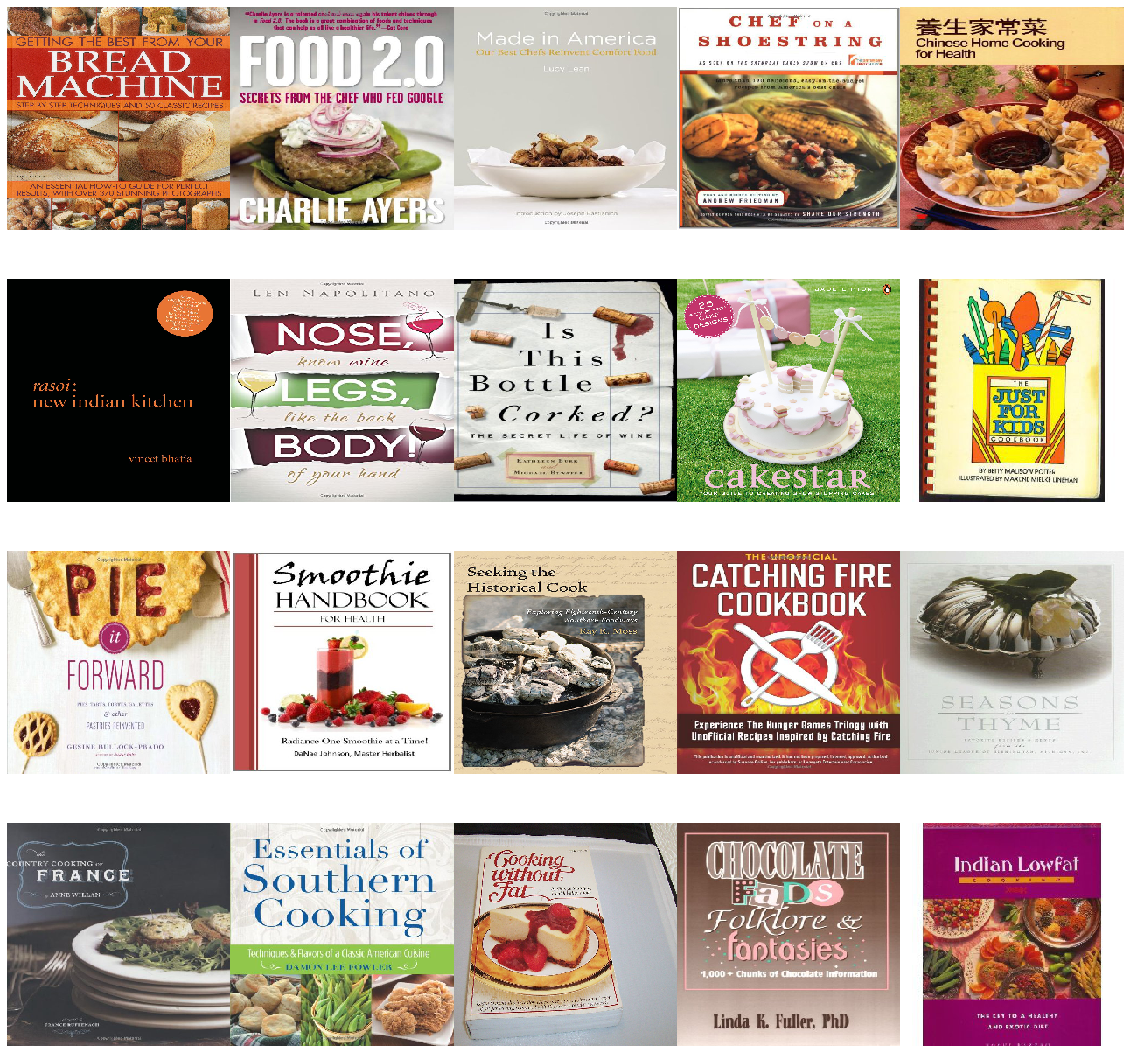

In [70]:
list_asins = np.array(data[data['wpics']==1].sample(20)['asin'])
plotCookbooks(list_asins)

In [79]:
import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

ratings_matrix_file = "../data/amzn/ratings_matrix.csv"
book_ids_file = "../data/amzn/ratings_matrix_bookIDs.json"
user_ids_file = "../data/amzn/ratings_matrix_reviwerIDs.json"

books_ASIN = json.loads(open(book_ids_file).read()) #asin to idx lookup
reviewer_ID = json.loads(open(user_ids_file).read()) #reviewerID to idx lookup

print(f"Number of books with reviews: {len(books_ASIN)}")
print(f"Number of users: {len(reviewer_ID)}")

reco_cookbooks = SVD(verbose=True, random_state=333)
review_reader = Reader(line_format="item user rating", sep=",")
cookbook_ratings = Dataset.load_from_file(ratings_matrix_file, reader = review_reader)
cross_validate(reco_cookbooks, cookbook_ratings, measures=['RMSE', 'MAE'], cv=5, 
               return_train_measures=True, n_jobs=-1, verbose=True)

Number of books with reviews: 15782
Number of users: 210808
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9342  0.9370  0.9327  0.9284  0.9342  0.9333  0.0028  
MAE (testset)     0.6756  0.6765  0.6747  0.6730  0.6752  0.6750  0.0012  
RMSE (trainset)   0.6474  0.6455  0.6475  0.6480  0.6468  0.6470  0.0008  
MAE (trainset)    0.4671  0.4656  0.4670  0.4672  0.4660  0.4666  0.0007  
Fit time          18.95   20.40   21.04   20.29   18.54   19.84   0.94    
Test time         0.78    0.78    0.78    0.68    0.74    0.75    0.04    


{'test_rmse': array([0.93420794, 0.93704331, 0.93266397, 0.92838177, 0.934207  ]),
 'train_rmse': array([0.64736944, 0.64550084, 0.64745263, 0.6479706 , 0.64684175]),
 'test_mae': array([0.6755578 , 0.67651599, 0.67467195, 0.67296466, 0.67522501]),
 'train_mae': array([0.46714015, 0.46559561, 0.46704476, 0.46724703, 0.46596807]),
 'fit_time': (18.95078706741333,
  20.4022479057312,
  21.0438871383667,
  20.285433053970337,
  18.537821054458618),
 'test_time': (0.7785890102386475,
  0.7779519557952881,
  0.7845938205718994,
  0.6787221431732178,
  0.7407269477844238)}

In [91]:
from surprise.model_selection import GridSearchCV

reco_cookbooks = SVD(verbose=True, random_state=333)
review_reader = Reader(line_format="item user rating", sep=",")
ratings = Dataset.load_from_file(ratings_matrix_file, reader = review_reader)

#trainset, testset = train_test_split(ratings, test_size=.20)
#print(type(trainset))

traiset = ratings.build_full_trainset()

param_grid = {'biased': [True, False], 'lr_all': [0.002, 0.005],
              'reg_all': [0.001, 0.1], 'random_state':[333], 'verbose':[True]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(ratings)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing

Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processin

In [92]:
param_grid2 = {'biased': [True], 'lr_all': [0.005],
              'reg_all': [0.05, 0.08, 0.12, 0.14, 0.16, 1], 'random_state':[333], 'verbose':[True]}
gs = GridSearchCV(SVD, param_grid2, measures=['rmse', 'mae'], cv=5)
gs.fit(ratings)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing

Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processin

In [140]:
param_grid3 = {'biased':True, 'lr_all':0.005,
              'reg_all':0.16, 'random_state':333, 'verbose':True}
model = SVD(**param_grid3)

cross_validate(model, ratings, measures=['RMSE', 'MAE'], cv=5, 
               return_train_measures=True, n_jobs=-1, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9359  0.9239  0.9247  0.9327  0.9317  0.9298  0.0047  
MAE (testset)     0.6809  0.6761  0.6761  0.6799  0.6801  0.6786  0.0021  
RMSE (trainset)   0.7390  0.7418  0.7414  0.7399  0.7403  0.7405  0.0010  
MAE (trainset)    0.5389  0.5407  0.5405  0.5393  0.5393  0.5397  0.0007  
Fit time          18.88   20.09   20.52   19.62   18.62   19.55   0.71    
Test time         0.75    0.80    0.69    0.66    0.64    0.71    0.06    


{'test_rmse': array([0.93587795, 0.92389506, 0.92470868, 0.93274544, 0.93166297]),
 'train_rmse': array([0.7390125 , 0.74182915, 0.74137817, 0.73987116, 0.74025459]),
 'test_mae': array([0.68091163, 0.67612407, 0.67614806, 0.67992554, 0.68012974]),
 'train_mae': array([0.53891233, 0.54071694, 0.54046489, 0.53927793, 0.53930046]),
 'fit_time': (18.88398790359497,
  20.094138860702515,
  20.51632308959961,
  19.61800503730774,
  18.61761212348938),
 'test_time': (0.7470548152923584,
  0.8036401271820068,
  0.687467098236084,
  0.660557746887207,
  0.641312837600708)}

In [139]:
param_grid4 = {'biased':True, 'lr_all':0.005,
              'reg_all':1, 'random_state':333, 'verbose':True}
model4 = SVD(**param_grid4)

cross_validate(model4, ratings, measures=['RMSE', 'MAE'], cv=5, 
               return_train_measures=True, n_jobs=-1, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9326  0.9322  0.9416  0.9358  0.9359  0.9356  0.0034  
MAE (testset)     0.6973  0.6966  0.7008  0.6978  0.6984  0.6982  0.0014  
RMSE (trainset)   0.8284  0.8275  0.8252  0.8263  0.8263  0.8267  0.0011  
MAE (trainset)    0.6213  0.6187  0.6173  0.6182  0.6184  0.6188  0.0013  
Fit time          18.88   20.19   20.80   20.41   18.68   19.79   0.85    
Test time         0.81    0.79    0.76    0.66    0.72    0.75    0.06    


{'test_rmse': array([0.93258265, 0.93219908, 0.94164999, 0.93576151, 0.93594198]),
 'train_rmse': array([0.82840542, 0.82748344, 0.82516498, 0.8263332 , 0.8262673 ]),
 'test_mae': array([0.6973439 , 0.69663293, 0.70079277, 0.69784431, 0.69842034]),
 'train_mae': array([0.62125725, 0.61872307, 0.6173222 , 0.61820196, 0.61838499]),
 'fit_time': (18.87965416908264,
  20.187983989715576,
  20.80094075202942,
  20.412179946899414,
  18.679493188858032),
 'test_time': (0.8107771873474121,
  0.7906920909881592,
  0.7630147933959961,
  0.6552088260650635,
  0.72222900390625)}

In [143]:
param_grid5 = {'n_factors':[20, 40, 60, 80], 'biased':[True], 'lr_all':[0.005],
              'reg_all':[0.16], 'random_state':[333], 'verbose':[True]}
gs5 = GridSearchCV(SVD, param_grid5, measures=['rmse', 'mae'], cv=5)
gs5.fit(ratings)

# best RMSE score
print(gs5.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs5.best_params['rmse'])

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing

In [136]:
!pip install scikit-optimize

     |████████████████████████████████| 81kB 2.7MB/s eta 0:00:01


In [138]:
from skopt import BayesSearchCV

params_bayes = {'n_factors':(50, 100,'uniform'), 'biased': [True, False], 'lr_all': [0.005],
              'reg_all': (1e-6, 1e+6, 'log-uniform'), 'random_state':[333], 'verbose':[True]
               }
opt = BayesSearchCV(
    SVD,
    params_bayes,
    n_iter=5,
    cv=5
)
opt.fit(ratings)

//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


TypeError: __init__() got an unexpected keyword argument 'fit_params'

In [105]:
books_Idx2ASIN = {v:k for k, v in books_ASIN.items()}
reviewer_Idx2ID = {v:k for k, v in reviewer_ID.items()}

In [144]:
#-- https://surprise.readthedocs.io/en/stable/FAQ.html#raw-inner-note

In [126]:
book_pred_IDs = [856, 7739]

books_to_get= [books_ASIN[asin] in book_pred_IDs for asin in data[data['avg_ratings']>0]['asin']]
data[data['avg_ratings']>0][books_to_get]

,asin,title,title_clean,title_count,description,desc_clean,desc_count,title_ok,desc_ok,use_these,avg_ratings,wpics
2018,0307954560,Meatless: More Than 200 of the Very Best Veget...,meatless more than of the very best vegetar...,9,"[, For more than twenty years, the food editor...",for more than twenty years the food edi...,70,1,1,1,4.422857,1
25175,1499292546,The Vegan Slow Cooker Cookbook: 38 Easy To Pre...,the vegan slow cooker cookbook easy to prep...,14,"[, ]",,0,1,0,0,4.444444,0


In [130]:
#books_ASIN['194035286X'] ==> 12110
#pred = algo.predict(uid, iid, verbose=True)
print(type(model4))

<class 'surprise.prediction_algorithms.matrix_factorization.SVD'>
